In [1]:
import os
import pandas as pd
import numpy as np
import json
import re
import gensim
import nltk
import requests
import datetime
import seaborn as sns
import calplot

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import re



today = datetime.today()

## Job Portal - WORKBANK

In [ ]:
WORKBANK_JOB_TITLE = []
WORKBANK_JOB_CATEGORY = []
WORKBANK_JOB_COMPANY = []
WORKBANK_JOB_DATE = []
WORKBANK_JOB_LOCATION = []
WORKBANK_JOB_STATUS = []
WORKBANK_JOB_SALARY = []
WORKBANK_JOB_EDUCATION = []
WORKBANK_JOB_DESCRIPTION = []
WORKBANK_JOB_YEAR_WE = []
#Information Communications Technology
IT_WORKBANK_URL = 'https://www.workbank.com/job/information-communications-technology-job-openings?wb_q='
IT_WORKBANK = requests.get(IT_WORKBANK_URL)
IT_WORKBANK_soup = BeautifulSoup(IT_WORKBANK.content, 'html.parser')
IT_WORKBANK_PP = IT_WORKBANK_soup.find_all('select',{'class':'wb-pagination-select'})
if (len(IT_WORKBANK_PP)!=0):
    IT_WORKBANK_NUMPAGES=len(IT_WORKBANK_PP[0].select("option"))
else:
    IT_WORKBANK_NUMPAGES=0
IT_WORKBANK_PAGES=[]
if (IT_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        IT_WORKBANK_PAGES.append('https://www.workbank.com/job/information-communications-technology-job-openings?page='+ str(i))
else:
    IT_WORKBANK_PAGES.append('https://www.workbank.com/job/information-communications-technology-job-openings?page=1')
for i in range(len(IT_WORKBANK_PAGES)):
    IT_WORKBANK_URLs = IT_WORKBANK_PAGES[i]
    IT_WORKBANK_PAGE = requests.get(IT_WORKBANK_URLs)
    IT_WORKBANK_PAGE_soup = BeautifulSoup(IT_WORKBANK_PAGE.content, 'html.parser')
    IT_WORKBANK_JOBS = IT_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    IT_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(IT_WORKBANK_JOBS))
    IT_WORKBANK_JOB_DATEs = IT_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(IT_WORKBANK_JOB_URLs)):
        IT_WORKBANK_JOB_PAGE = requests.get(IT_WORKBANK_JOB_URLs[j])
        IT_WORKBANK_JOB_PAGE_soup = BeautifulSoup(IT_WORKBANK_JOB_PAGE.content, 'html.parser')
        IT_WORKBANK_JOB_PAGE_INFO1 = IT_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        IT_WORKBANK_JOB_TITLE = IT_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        IT_WORKBANK_JOB_COMPANY = IT_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        IT_WORKBANK_JOB_SALARY = IT_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        IT_WORKBANK_JOB_DATEPOSTED = IT_WORKBANK_JOB_DATEs[j].text.strip()
        IT_WORKBANK_JOB_LOCATION = IT_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        IT_WORKBANK_JOB_INFO2 = IT_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        IT_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        IT_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        IT_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        IT_WORKBANK_JOB_CATEGORY = "Information and Communications Technology"
        IT_WORKBANK_JOB_INFO3 = IT_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        IT_WORKBANK_JOB_DESCRIPTION = IT_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(IT_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(IT_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(IT_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(IT_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(IT_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(IT_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(IT_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_EDUCATION.append(IT_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_YEAR_WE.append(IT_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_DESCRIPTION.append(IT_WORKBANK_JOB_DESCRIPTION)
#Construction
CONSTRUCTION_WORKBANK_URL = 'https://www.workbank.com/job/construction-job-openings?wb_q='
CONSTRUCTION_WORKBANK = requests.get(CONSTRUCTION_WORKBANK_URL)
CONSTRUCTION_WORKBANK_soup = BeautifulSoup(CONSTRUCTION_WORKBANK.content, 'html.parser')
CONSTRUCTION_WORKBANK_PP = CONSTRUCTION_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(CONSTRUCTION_WORKBANK_PP)!=0):
    CONSTRUCTION_WORKBANK_NUMPAGES=len(CONSTRUCTION_WORKBANK_PP[0].select("option"))
else:
    CONSTRUCTION_WORKBANK_NUMPAGES=0
CONSTRUCTION_WORKBANK_PAGES=[]
if (CONSTRUCTION_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        CONSTRUCTION_WORKBANK_PAGES.append('https://www.workbank.com/job/construction-job-openings?page='+ str(i))
else:
    CONSTRUCTION_WORKBANK_PAGES.append('https://www.workbank.com/job/construction-job-openings?page=1')
for i in range(len(CONSTRUCTION_WORKBANK_PAGES)):
    CONSTRUCTION_WORKBANK_URLs = CONSTRUCTION_WORKBANK_PAGES[i]
    CONSTRUCTION_WORKBANK_PAGE = requests.get(CONSTRUCTION_WORKBANK_URLs)
    CONSTRUCTION_WORKBANK_PAGE_soup = BeautifulSoup(CONSTRUCTION_WORKBANK_PAGE.content, 'html.parser')
    CONSTRUCTION_WORKBANK_JOBS = CONSTRUCTION_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    CONSTRUCTION_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(CONSTRUCTION_WORKBANK_JOBS))
    CONSTRUCTION_WORKBANK_JOB_DATEs = CONSTRUCTION_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(CONSTRUCTION_WORKBANK_JOB_URLs)):
        CONSTRUCTION_WORKBANK_JOB_PAGE = requests.get(CONSTRUCTION_WORKBANK_JOB_URLs[j])
        CONSTRUCTION_WORKBANK_JOB_PAGE_soup = BeautifulSoup(CONSTRUCTION_WORKBANK_JOB_PAGE.content, 'html.parser')
        CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1 = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        CONSTRUCTION_WORKBANK_JOB_TITLE = CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        CONSTRUCTION_WORKBANK_JOB_COMPANY = CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        CONSTRUCTION_WORKBANK_JOB_SALARY = CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        CONSTRUCTION_WORKBANK_JOB_DATEPOSTED = CONSTRUCTION_WORKBANK_JOB_DATEs[j].text.strip()
        CONSTRUCTION_WORKBANK_JOB_LOCATION = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        CONSTRUCTION_WORKBANK_JOB_INFO2 = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        CONSTRUCTION_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(CONSTRUCTION_WORKBANK_JOB_INFO2))[0]
        CONSTRUCTION_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(CONSTRUCTION_WORKBANK_JOB_INFO2))[0]
        CONSTRUCTION_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        CONSTRUCTION_WORKBANK_JOB_CATEGORY = "Construction"
        CONSTRUCTION_WORKBANK_JOB_INFO3 = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        CONSTRUCTION_WORKBANK_JOB_DESCRIPTION = CONSTRUCTION_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(CONSTRUCTION_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(CONSTRUCTION_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(CONSTRUCTION_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(CONSTRUCTION_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(CONSTRUCTION_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(CONSTRUCTION_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(CONSTRUCTION_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_EDUCATION.append(CONSTRUCTION_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_YEAR_WE.append(CONSTRUCTION_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_DESCRIPTION.append(CONSTRUCTION_WORKBANK_JOB_DESCRIPTION)
#Design and Architecture
ARCHITECTURE_WORKBANK_URL = 'https://www.workbank.com/job/design-architecture-job-openings?wb_q='
ARCHITECTURE_WORKBANK = requests.get(ARCHITECTURE_WORKBANK_URL)
ARCHITECTURE_WORKBANK_soup = BeautifulSoup(ARCHITECTURE_WORKBANK.content, 'html.parser')
ARCHITECTURE_WORKBANK_PP = ARCHITECTURE_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(ARCHITECTURE_WORKBANK_PP)!=0):
    ARCHITECTURE_WORKBANK_NUMPAGES=len(ARCHITECTURE_WORKBANK_PP[0].select("option"))
else:
    ARCHITECTURE_WORKBANK_NUMPAGES=0
ARCHITECTURE_WORKBANK_PAGES=[]
if (ARCHITECTURE_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        ARCHITECTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/design-architecture-job-openings?page='+ str(i))
else:
    ARCHITECTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/design-architecture-job-openings?page=1')
for i in range(len(ARCHITECTURE_WORKBANK_PAGES)):
    ARCHITECTURE_WORKBANK_URLs = ARCHITECTURE_WORKBANK_PAGES[i]
    ARCHITECTURE_WORKBANK_PAGE = requests.get(ARCHITECTURE_WORKBANK_URLs)
    ARCHITECTURE_WORKBANK_PAGE_soup = BeautifulSoup(ARCHITECTURE_WORKBANK_PAGE.content, 'html.parser')
    ARCHITECTURE_WORKBANK_JOBS = ARCHITECTURE_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    ARCHITECTURE_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(ARCHITECTURE_WORKBANK_JOBS))
    ARCHITECTURE_WORKBANK_JOB_DATEs = ARCHITECTURE_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(ARCHITECTURE_WORKBANK_JOB_URLs)):
        ARCHITECTURE_WORKBANK_JOB_PAGE = requests.get(ARCHITECTURE_WORKBANK_JOB_URLs[j])
        ARCHITECTURE_WORKBANK_JOB_PAGE_soup = BeautifulSoup(ARCHITECTURE_WORKBANK_JOB_PAGE.content, 'html.parser')
        ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1 = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        ARCHITECTURE_WORKBANK_JOB_TITLE = ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        ARCHITECTURE_WORKBANK_JOB_COMPANY = ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        ARCHITECTURE_WORKBANK_JOB_SALARY = ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        ARCHITECTURE_WORKBANK_JOB_DATEPOSTED = ARCHITECTURE_WORKBANK_JOB_DATEs[j].text.strip()
        ARCHITECTURE_WORKBANK_JOB_LOCATION = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        ARCHITECTURE_WORKBANK_JOB_INFO2 = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        ARCHITECTURE_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(ARCHITECTURE_WORKBANK_JOB_INFO2))[0]
        ARCHITECTURE_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(ARCHITECTURE_WORKBANK_JOB_INFO2))[0]
        ARCHITECTURE_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        ARCHITECTURE_WORKBANK_JOB_CATEGORY = "Design and Architecture"
        ARCHITECTURE_WORKBANK_JOB_INFO3 = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        ARCHITECTURE_WORKBANK_JOB_DESCRIPTION = ARCHITECTURE_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(ARCHITECTURE_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(ARCHITECTURE_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(ARCHITECTURE_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(ARCHITECTURE_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(ARCHITECTURE_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(ARCHITECTURE_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(ARCHITECTURE_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_EDUCATION.append(ARCHITECTURE_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_YEAR_WE.append(ARCHITECTURE_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_DESCRIPTION.append(ARCHITECTURE_WORKBANK_JOB_DESCRIPTION)
#Agriculture and Wildlife Conservation
AGRICULTURE_WORKBANK_URL = 'https://www.workbank.com/job/agriculture-wildlife-conservation-job-openings?wb_q='
AGRICULTURE_WORKBANK = requests.get(AGRICULTURE_WORKBANK_URL)
AGRICULTURE_WORKBANK_soup = BeautifulSoup(AGRICULTURE_WORKBANK.content, 'html.parser')
AGRICULTURE_WORKBANK_PP = AGRICULTURE_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(AGRICULTURE_WORKBANK_PP)!=0):
    AGRICULTURE_WORKBANK_NUMPAGES=len(AGRICULTURE_WORKBANK_PP[0].select("option"))
else:
    AGRICULTURE_WORKBANK_NUMPAGES=0
AGRICULTURE_WORKBANK_PAGES=[]
if (AGRICULTURE_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        AGRICULTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/agriculture-wildlife-conservation-job-openings?page='+ str(i))
else:
    AGRICULTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/agriculture-wildlife-conservation-job-openings?page=1')
for i in range(len(AGRICULTURE_WORKBANK_PAGES)):
    AGRICULTURE_WORKBANK_URLs = AGRICULTURE_WORKBANK_PAGES[i]
    AGRICULTURE_WORKBANK_PAGE = requests.get(AGRICULTURE_WORKBANK_URLs)
    AGRICULTURE_WORKBANK_PAGE_soup = BeautifulSoup(AGRICULTURE_WORKBANK_PAGE.content, 'html.parser')
    AGRICULTURE_WORKBANK_JOBS = AGRICULTURE_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    AGRICULTURE_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(AGRICULTURE_WORKBANK_JOBS))
    AGRICULTURE_WORKBANK_JOB_DATEs = AGRICULTURE_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(AGRICULTURE_WORKBANK_JOB_URLs)):
        AGRICULTURE_WORKBANK_JOB_PAGE = requests.get(AGRICULTURE_WORKBANK_JOB_URLs[j])
        AGRICULTURE_WORKBANK_JOB_PAGE_soup = BeautifulSoup(AGRICULTURE_WORKBANK_JOB_PAGE.content, 'html.parser')
        AGRICULTURE_WORKBANK_JOB_PAGE_INFO1 = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        AGRICULTURE_WORKBANK_JOB_TITLE = AGRICULTURE_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        AGRICULTURE_WORKBANK_JOB_COMPANY = AGRICULTURE_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        AGRICULTURE_WORKBANK_JOB_SALARY = AGRICULTURE_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        AGRICULTURE_WORKBANK_JOB_DATEPOSTED = AGRICULTURE_WORKBANK_JOB_DATEs[j].text.strip()
        AGRICULTURE_WORKBANK_JOB_LOCATION = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        AGRICULTURE_WORKBANK_JOB_INFO2 = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        AGRICULTURE_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(AGRICULTURE_WORKBANK_JOB_INFO2))[0]
        AGRICULTURE_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(AGRICULTURE_WORKBANK_JOB_INFO2))[0]
        AGRICULTURE_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        AGRICULTURE_WORKBANK_JOB_CATEGORY = "Agriculture and Wildlife Conservation"
        AGRICULTURE_WORKBANK_JOB_INFO3 = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        AGRICULTURE_WORKBANK_JOB_DESCRIPTION = AGRICULTURE_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(AGRICULTURE_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(AGRICULTURE_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(AGRICULTURE_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(AGRICULTURE_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(AGRICULTURE_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(AGRICULTURE_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(AGRICULTURE_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(AGRICULTURE_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(AGRICULTURE_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(AGRICULTURE_WORKBANK_JOB_DESCRIPTION)
#Environmental and Health Safety
SAFETY_WORKBANK_URL = 'https://www.workbank.com/job/environmental-health-safety-job-openings?wb_q='
SAFETY_WORKBANK = requests.get(SAFETY_WORKBANK_URL)
SAFETY_WORKBANK_soup = BeautifulSoup(SAFETY_WORKBANK.content, 'html.parser')
SAFETY_WORKBANK_PP = SAFETY_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(SAFETY_WORKBANK_PP)!=0):
    SAFETY_WORKBANK_NUMPAGES=len(SAFETY_WORKBANK_PP[0].select("option"))
else:
    SAFETY_WORKBANK_NUMPAGES=0
SAFETY_WORKBANK_PAGES=[]
if (SAFETY_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        SAFETY_WORKBANK_PAGES.append('https://www.workbank.com/job/environmental-health-safety-job-openings?page='+ str(i))
else:
    SAFETY_WORKBANK_PAGES.append('https://www.workbank.com/job/environmental-health-safety-job-openings?page=1')
for i in range(len(SAFETY_WORKBANK_PAGES)):
    SAFETY_WORKBANK_URLs = SAFETY_WORKBANK_PAGES[i]
    SAFETY_WORKBANK_PAGE = requests.get(SAFETY_WORKBANK_URLs)
    SAFETY_WORKBANK_PAGE_soup = BeautifulSoup(SAFETY_WORKBANK_PAGE.content, 'html.parser')
    SAFETY_WORKBANK_JOBS = SAFETY_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    SAFETY_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(SAFETY_WORKBANK_JOBS))
    SAFETY_WORKBANK_JOB_DATEs = SAFETY_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(SAFETY_WORKBANK_JOB_URLs)):
        SAFETY_WORKBANK_JOB_PAGE = requests.get(SAFETY_WORKBANK_JOB_URLs[j])
        SAFETY_WORKBANK_JOB_PAGE_soup = BeautifulSoup(SAFETY_WORKBANK_JOB_PAGE.content, 'html.parser')
        SAFETY_WORKBANK_JOB_PAGE_INFO1 = SAFETY_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        SAFETY_WORKBANK_JOB_TITLE = SAFETY_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        SAFETY_WORKBANK_JOB_COMPANY = SAFETY_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        SAFETY_WORKBANK_JOB_SALARY = SAFETY_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        SAFETY_WORKBANK_JOB_DATEPOSTED = SAFETY_WORKBANK_JOB_DATEs[j].text.strip()
        SAFETY_WORKBANK_JOB_LOCATION = SAFETY_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        SAFETY_WORKBANK_JOB_INFO2 = SAFETY_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        SAFETY_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(SAFETY_WORKBANK_JOB_INFO2))[0]
        SAFETY_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(SAFETY_WORKBANK_JOB_INFO2))[0]
        SAFETY_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        SAFETY_WORKBANK_JOB_CATEGORY = "Environmental and Health Safety"
        SAFETY_WORKBANK_JOB_INFO3 = SAFETY_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        SAFETY_WORKBANK_JOB_DESCRIPTION = SAFETY_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(SAFETY_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(SAFETY_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(SAFETY_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(SAFETY_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(SAFETY_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(SAFETY_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(SAFETY_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(SAFETY_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(SAFETY_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(SAFETY_WORKBANK_JOB_DESCRIPTION)
#Medical and Healthcare
HEALTH_WORKBANK_URL = 'https://www.workbank.com/job/medical-healthcare-job-openings?wb_q='
HEALTH_WORKBANK = requests.get(HEALTH_WORKBANK_URL)
HEALTH_WORKBANK_soup = BeautifulSoup(HEALTH_WORKBANK.content, 'html.parser')
HEALTH_WORKBANK_PP = HEALTH_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(HEALTH_WORKBANK_PP)!=0):
    HEALTH_WORKBANK_NUMPAGES=len(HEALTH_WORKBANK_PP[0].select("option"))
else:
    HEALTH_WORKBANK_NUMPAGES=0
HEALTH_WORKBANK_PAGES=[]
if (HEALTH_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        HEALTH_WORKBANK_PAGES.append('https://www.workbank.com/job/medical-healthcare-job-openings?page='+ str(i))
else:
    HEALTH_WORKBANK_PAGES.append('https://www.workbank.com/job/medical-healthcare-job-openings?page=1')
for i in range(len(HEALTH_WORKBANK_PAGES)):
    HEALTH_WORKBANK_URLs = HEALTH_WORKBANK_PAGES[i]
    HEALTH_WORKBANK_PAGE = requests.get(HEALTH_WORKBANK_URLs)
    HEALTH_WORKBANK_PAGE_soup = BeautifulSoup(HEALTH_WORKBANK_PAGE.content, 'html.parser')
    HEALTH_WORKBANK_JOBS = HEALTH_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    HEALTH_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(HEALTH_WORKBANK_JOBS))
    HEALTH_WORKBANK_JOB_DATEs = HEALTH_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(HEALTH_WORKBANK_JOB_URLs)):
        HEALTH_WORKBANK_JOB_PAGE = requests.get(HEALTH_WORKBANK_JOB_URLs[j])
        HEALTH_WORKBANK_JOB_PAGE_soup = BeautifulSoup(HEALTH_WORKBANK_JOB_PAGE.content, 'html.parser')
        HEALTH_WORKBANK_JOB_PAGE_INFO1 = HEALTH_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        HEALTH_WORKBANK_JOB_TITLE = HEALTH_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        HEALTH_WORKBANK_JOB_COMPANY = HEALTH_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        HEALTH_WORKBANK_JOB_SALARY = HEALTH_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        HEALTH_WORKBANK_JOB_DATEPOSTED = HEALTH_WORKBANK_JOB_DATEs[j].text.strip()
        HEALTH_WORKBANK_JOB_LOCATION = HEALTH_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        HEALTH_WORKBANK_JOB_INFO2 = HEALTH_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        HEALTH_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(HEALTH_WORKBANK_JOB_INFO2))[0]
        HEALTH_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(HEALTH_WORKBANK_JOB_INFO2))[0]
        HEALTH_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        HEALTH_WORKBANK_JOB_CATEGORY = "Medical and Healthcare"
        HEALTH_WORKBANK_JOB_INFO3 = HEALTH_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        HEALTH_WORKBANK_JOB_DESCRIPTION = HEALTH_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(HEALTH_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(HEALTH_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(HEALTH_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(HEALTH_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(HEALTH_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(HEALTH_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(HEALTH_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(HEALTH_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(HEALTH_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(HEALTH_WORKBANK_JOB_DESCRIPTION)
#Sciences
SCIENCES_WORKBANK_URL = 'https://www.workbank.com/job/sciences-job-openings?wb_q='
SCIENCES_WORKBANK = requests.get(SCIENCES_WORKBANK_URL)
SCIENCES_WORKBANK_soup = BeautifulSoup(SCIENCES_WORKBANK.content, 'html.parser')
SCIENCES_WORKBANK_PP = SCIENCES_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(SCIENCES_WORKBANK_PP)!=0):
    SCIENCES_WORKBANK_NUMPAGES=len(SCIENCES_WORKBANK_PP[0].select("option"))
else:
    SCIENCES_WORKBANK_NUMPAGES=0
SCIENCES_WORKBANK_PAGES=[]
if (SCIENCES_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        SCIENCES_WORKBANK_PAGES.append('https://www.workbank.com/job/sciences-job-openings?page='+ str(i))
else:
    SCIENCES_WORKBANK_PAGES.append('https://www.workbank.com/job/sciences-job-openings?page=1')
for i in range(len(SCIENCES_WORKBANK_PAGES)):
    SCIENCES_WORKBANK_URLs = SCIENCES_WORKBANK_PAGES[i]
    SCIENCES_WORKBANK_PAGE = requests.get(SCIENCES_WORKBANK_URLs)
    SCIENCES_WORKBANK_PAGE_soup = BeautifulSoup(SCIENCES_WORKBANK_PAGE.content, 'html.parser')
    SCIENCES_WORKBANK_JOBS = SCIENCES_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    SCIENCES_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(SCIENCES_WORKBANK_JOBS))
    SCIENCES_WORKBANK_JOB_DATEs = SCIENCES_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(SCIENCES_WORKBANK_JOB_URLs)):
        SCIENCES_WORKBANK_JOB_PAGE = requests.get(SCIENCES_WORKBANK_JOB_URLs[j])
        SCIENCES_WORKBANK_JOB_PAGE_soup = BeautifulSoup(SCIENCES_WORKBANK_JOB_PAGE.content, 'html.parser')
        SCIENCES_WORKBANK_JOB_PAGE_INFO1 = SCIENCES_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        SCIENCES_WORKBANK_JOB_TITLE = SCIENCES_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        SCIENCES_WORKBANK_JOB_COMPANY = SCIENCES_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        SCIENCES_WORKBANK_JOB_SALARY = SCIENCES_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        SCIENCES_WORKBANK_JOB_DATEPOSTED = SCIENCES_WORKBANK_JOB_DATEs[j].text.strip()
        SCIENCES_WORKBANK_JOB_LOCATION = SCIENCES_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        SCIENCES_WORKBANK_JOB_INFO2 = SCIENCES_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        SCIENCES_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(SCIENCES_WORKBANK_JOB_INFO2))[0]
        SCIENCES_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(SCIENCES_WORKBANK_JOB_INFO2))[0]
        SCIENCES_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        SCIENCES_WORKBANK_JOB_CATEGORY = "Sciences"
        SCIENCES_WORKBANK_JOB_INFO3 = SCIENCES_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        SCIENCES_WORKBANK_JOB_DESCRIPTION = SCIENCES_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(SCIENCES_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(SCIENCES_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(SCIENCES_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(SCIENCES_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(SCIENCES_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(SCIENCES_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(SCIENCES_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(SCIENCES_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(SCIENCES_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(SCIENCES_WORKBANK_JOB_DESCRIPTION)
#Actuarial
ACTUARIAL_WORKBANK_URL = 'https://www.workbank.com/job/hiring-actuarial'
ACTUARIAL_WORKBANK = requests.get(ACTUARIAL_WORKBANK_URL)
ACTUARIAL_WORKBANK_soup = BeautifulSoup(ACTUARIAL_WORKBANK.content, 'html.parser')
ACTUARIAL_WORKBANK_PP = ACTUARIAL_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(ACTUARIAL_WORKBANK_PP)!=0):
    ACTUARIAL_WORKBANK_NUMPAGES=len(ACTUARIAL_WORKBANK_PP[0].select("option"))
else:
    ACTUARIAL_WORKBANK_NUMPAGES=0
ACTUARIAL_WORKBANK_PAGES=[]
if (ACTUARIAL_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        ACTUARIAL_WORKBANK_PAGES.append('https://www.workbank.com/job/hiring-actuarial?page='+ str(i))
else:
    ACTUARIAL_WORKBANK_PAGES.append('https://www.workbank.com/job/hiring-actuarial?page=1')
for i in range(len(ACTUARIAL_WORKBANK_PAGES)):
    ACTUARIAL_WORKBANK_URLs = ACTUARIAL_WORKBANK_PAGES[i]
    ACTUARIAL_WORKBANK_PAGE = requests.get(ACTUARIAL_WORKBANK_URLs)
    ACTUARIAL_WORKBANK_PAGE_soup = BeautifulSoup(ACTUARIAL_WORKBANK_PAGE.content, 'html.parser')
    ACTUARIAL_WORKBANK_JOBS = ACTUARIAL_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    ACTUARIAL_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(ACTUARIAL_WORKBANK_JOBS))
    ACTUARIAL_WORKBANK_JOB_DATEs = ACTUARIAL_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(ACTUARIAL_WORKBANK_JOB_URLs)):
        ACTUARIAL_WORKBANK_JOB_PAGE = requests.get(ACTUARIAL_WORKBANK_JOB_URLs[j])
        ACTUARIAL_WORKBANK_JOB_PAGE_soup = BeautifulSoup(ACTUARIAL_WORKBANK_JOB_PAGE.content, 'html.parser')
        ACTUARIAL_WORKBANK_JOB_PAGE_INFO1 = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        ACTUARIAL_WORKBANK_JOB_TITLE = ACTUARIAL_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        ACTUARIAL_WORKBANK_JOB_COMPANY = ACTUARIAL_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        ACTUARIAL_WORKBANK_JOB_SALARY = ACTUARIAL_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        ACTUARIAL_WORKBANK_JOB_DATEPOSTED = ACTUARIAL_WORKBANK_JOB_DATEs[j].text.strip()
        ACTUARIAL_WORKBANK_JOB_LOCATION = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        ACTUARIAL_WORKBANK_JOB_INFO2 = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        ACTUARIAL_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(ACTUARIAL_WORKBANK_JOB_INFO2))[0]
        ACTUARIAL_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(ACTUARIAL_WORKBANK_JOB_INFO2))[0]
        ACTUARIA_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        ACTUARIAL_WORKBANK_JOB_CATEGORY = "Actuarial"
        ACTUARIAL_WORKBANK_JOB_INFO3 = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        ACTUARIAL_WORKBANK_JOB_DESCRIPTION = ACTUARIAL_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(ACTUARIAL_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(ACTUARIAL_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(ACTUARIAL_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(ACTUARIAL_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(ACTUARIAL_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(ACTUARIAL_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(ACTUARIAL_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(ACTUARIA_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(ACTUARIAL_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(ACTUARIAL_WORKBANK_JOB_DESCRIPTION)

In [ ]:
workbank={'Website': "Workbank" ,
          'Job Title': WORKBANK_JOB_TITLE, 
          'Category': WORKBANK_JOB_CATEGORY, 
          'Company': WORKBANK_JOB_COMPANY, 
          'Date Posted': WORKBANK_JOB_DATE, 
          'Location': WORKBANK_JOB_LOCATION, 
          'Status': WORKBANK_JOB_STATUS, 
          'Salary': WORKBANK_JOB_SALARY, 
          'Education': WORKBANK_JOB_EDUCATION, 
          'Years of Work Expirience': WORKBANK_JOB_YEAR_WE,
          'Job Description': WORKBANK_JOB_DESCRIPTION}
workbank_df = pd.DataFrame(data=workbank)
workbank_df

In [ ]:
data = pinoy_jobs_df.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('pinoy jobs.json', 'w') as json_file:
    json.dump(parsed, json_file)

# Data Clean up (WORKBANK)

In [200]:
#Read from Json File 
workbank_df_json = pd.read_json (r'workbank.json')
workbank_df_json


,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description
0,Workbank,ServiceNow Administrator,Information and Communications Technology,"Indra Philippines, Inc.",Posted 21 hours ago,Work from Home,Full Time,,Bachelor’s Degree,3 - 5 Years,The ideal candidate will perform day to day su...
1,Workbank,Angular Developer,Information and Communications Technology,"Indra Philippines, Inc.",Posted 1 day ago,Work from Home,Contract,"PHP 80,000 - 90,000",Bachelor’s Degree,3 - 5 Years,- Analyze and understand requirements provided...
2,Workbank,API Tester,Information and Communications Technology,"Indra Philippines, Inc.",Posted 4 days ago,Work from Home,Contract,"PHP 40,000 - 70,000",Bachelor’s Degree,1 - 3 Years,Participate in all Scrum ceremonies (Sprint P...
3,Workbank,QA Tester (Manual/Functional Testing),Information and Communications Technology,"Indra Philippines, Inc.",Posted 4 days ago,Work from Home,Contract,"PHP 40,000 - 75,000",Bachelor’s Degree,3 - 5 Years,Self-organizing and cross functional developme...
4,Workbank,Senior QA Test Engineer,Information and Communications Technology,SnapMart Inc.,Posted 4 days ago,Taguig,Full Time,"PHP 80,000 - 130,000",Bachelor’s Degree,3 - 5 Years,"In this position, you will work closely with o..."
...,...,...,...,...,...,...,...,...,...,...,...
109,Workbank,PH Registered Nurse (PHRN),Medical and Healthcare,Hinduja Global Solutions,Posted 3 months ago,Quezon City,Full Time,"PHP 25,000 - 30,000",Bachelor’s Degree,1 - 3 Years,MINIMUM QUALIFICATIONS: BS NURSING Graduate Mu...
110,Workbank,US Registered Nurse (USRN),Medical and Healthcare,Hinduja Global Solutions,Posted 3 months ago,Quezon City,Full Time,,Bachelor’s Degree,1 - 3 Years,US Registered Nurse (USRN) with 100k Retention...
111,Workbank,Company Nurse,Medical and Healthcare,"Gardenia Bakeries Philippines, Inc.",Posted 3 months ago,Biñan City,Contract,,Bachelor’s Degree,1 - 3 Years,Administer first aid treatments and provide me...
112,Workbank,US Registered Nurse Analyst,Medical and Healthcare,"Accenture, Inc.",Posted 3 months ago,National Capital Region,Full Time,"PHP 35,000 - 40,000",Bachelor’s Degree,1 - 3 Years,Go through a faster and more convenient recrui...


In [201]:
#Gets the Min Salary
def salary_seperatorinator_MIN(salary):
    if salary:
        str2 = (salary.replace('PHP', ''))
        str3 = (str2.replace(',', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            return stroutput[0]
    else:
        return "Not Specified"
def salary_seperatorinator_MAX(salary):
    if salary:
        str2 = (salary.replace('PHP', ''))
        str3 = (str2.replace(',', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            if len(stroutput) > 1:
                return stroutput[1]
            else:
                return stroutput[0]
    else:
        return "Not Specified"
#Gets the Min Years Expirience
def expirience_inator_MIN(years):
    if years:
        str3 = (years.replace('-', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            return stroutput[0]
    else:
        return "Not Specified"
#Gets the Max Years Expirience
def expirience_inator_Max(years):
    if years:
        str3 = (years.replace('-', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            try:
                return stroutput[1]
            except:
                return stroutput[0]
    else:
        return "Not Specified"
        
def status_cleanator_workbank(status):
    if (len(re.findall(r"Full",status, re.IGNORECASE)) > 0):
        return ("Full Time")
    elif(len(re.findall(r"Part",status, re.IGNORECASE)) > 0):
        return ("Part Time")
    elif(len(re.findall(r"Contract",status, re.IGNORECASE)) > 0):
        return ("Contract Base")
    elif(len(re.findall(r"Project",status, re.IGNORECASE)) > 0):
        return ("Project Base")    
    elif(len(re.findall(r"Freelance",status, re.IGNORECASE)) > 0):
        return ("Freelance")        
    else: return status


In [202]:
#Converts the Date Format
date_scraped = '5/26/21'
date_scraped = datetime.strptime(date_scraped, '%m/%d/%y')
new_date_posted = []
for index, row in workbank_df_json.iterrows():
    if "minutes" in row["Date Posted"]:
        then = date_scraped - timedelta(minutes=int(re.sub('\D', '', row["Date Posted"])))
    elif "hour" in row["Date Posted"]:
        then = date_scraped - timedelta(hours=int(re.sub('\D', '', row["Date Posted"])))
    elif "day" in row["Date Posted"]:
        then = date_scraped - timedelta(days=int(re.sub('\D', '', row["Date Posted"])))
    elif "week" in row["Date Posted"]:
        then = date_scraped - timedelta(weeks=int(re.sub('\D', '', row["Date Posted"])))
    elif "month" in row["Date Posted"]:
        then = date_scraped - relativedelta(months=int(re.sub('\D', '', row["Date Posted"])))
    elif "year" in row["Date Posted"]:
        then = date_scraped - relativedelta(years=int(re.sub('\D', '', row["Date Posted"])))
    new_date_posted.append(then.date())
workbank_df_json["Date Posted"] = new_date_posted

In [203]:
workbank_df_json["Min Salary"]= workbank_df_json["Salary"].apply(salary_seperatorinator_MIN)
workbank_df_json["Max Salary"]= workbank_df_json["Salary"].apply(salary_seperatorinator_MAX)
workbank_df_json["Min Years of Work Expirience"]= workbank_df_json["Years of Work Expirience"].apply(expirience_inator_MIN)
workbank_df_json["Max Years of Work Expirience"]= workbank_df_json["Years of Work Expirience"].apply(expirience_inator_Max)
workbank_df_json["Status"]= workbank_df_json["Status"].apply(status_cleanator_workbank)
workbank_df_json


,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description,Min Salary,Max Salary,Min Years of Work Expirience,Max Years of Work Expirience
0,Workbank,ServiceNow Administrator,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Full Time,,Bachelor’s Degree,3 - 5 Years,The ideal candidate will perform day to day su...,Not Specified,Not Specified,3,5
1,Workbank,Angular Developer,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Contract Base,"PHP 80,000 - 90,000",Bachelor’s Degree,3 - 5 Years,- Analyze and understand requirements provided...,80000,90000,3,5
2,Workbank,API Tester,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,"PHP 40,000 - 70,000",Bachelor’s Degree,1 - 3 Years,Participate in all Scrum ceremonies (Sprint P...,40000,70000,1,3
3,Workbank,QA Tester (Manual/Functional Testing),Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,"PHP 40,000 - 75,000",Bachelor’s Degree,3 - 5 Years,Self-organizing and cross functional developme...,40000,75000,3,5
4,Workbank,Senior QA Test Engineer,Information and Communications Technology,SnapMart Inc.,2021-05-22,Taguig,Full Time,"PHP 80,000 - 130,000",Bachelor’s Degree,3 - 5 Years,"In this position, you will work closely with o...",80000,130000,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Workbank,PH Registered Nurse (PHRN),Medical and Healthcare,Hinduja Global Solutions,2021-02-26,Quezon City,Full Time,"PHP 25,000 - 30,000",Bachelor’s Degree,1 - 3 Years,MINIMUM QUALIFICATIONS: BS NURSING Graduate Mu...,25000,30000,1,3
110,Workbank,US Registered Nurse (USRN),Medical and Healthcare,Hinduja Global Solutions,2021-02-26,Quezon City,Full Time,,Bachelor’s Degree,1 - 3 Years,US Registered Nurse (USRN) with 100k Retention...,Not Specified,Not Specified,1,3
111,Workbank,Company Nurse,Medical and Healthcare,"Gardenia Bakeries Philippines, Inc.",2021-02-26,Biñan City,Contract Base,,Bachelor’s Degree,1 - 3 Years,Administer first aid treatments and provide me...,Not Specified,Not Specified,1,3
112,Workbank,US Registered Nurse Analyst,Medical and Healthcare,"Accenture, Inc.",2021-02-26,National Capital Region,Full Time,"PHP 35,000 - 40,000",Bachelor’s Degree,1 - 3 Years,Go through a faster and more convenient recrui...,35000,40000,1,3


In [ ]:
data = workbank_df_json.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('workbank_df_json_clean.json', 'w') as json_file:
    json.dump(parsed, json_file)

# Pinoy Jobs

In [4]:
PinoyJobs_URL_List = []
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/engineering-construction-electrical/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/it-programming-systems-networks/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/manufacturing-production/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/nursing-medical-dental-health/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/sciences-lab-research/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/web-development-design-html-seo/")
job_title_list = []
job_employment_type_list = []
job_jobLocation_list = []
job_dateposted_list = []
job_desc_list = []
job_salary_list = []
job_location_list = []
job_type_list = []
comapny_name_list = []
for web_URL in range(len(PinoyJobs_URL_List)):
    URL = PinoyJobs_URL_List[web_URL]
    #print(PinoyJobs_URL_List[web_URL])
    page=requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    for ul in soup.find_all('ul', {"class": "pagination hide-on-small-only"}):
        page_num = ul.find_all("li")
        max_page = int(page_num[len(page_num)-2].text.strip())
        #print(page_num[len(page_num)-2].text)
    for web_pages in range(0,max_page): ##max_page
        URL = PinoyJobs_URL_List[web_URL] + "page/{}/".format(web_pages)
        page=requests.get(URL)
        soup = BeautifulSoup(page.content, 'html.parser')
        jobURL_List = []
        for div in soup.find_all('div', class_='card-content'):
             for a in div.find_all('a', href=True):
                jobURL_List.append(a['href'])
                ##print ("Found the URL:", a['href'])
        for k in range(len(jobURL_List)): ##len(jobURL_List)
            jobURL = jobURL_List[k]
            ##print(jobURL)
            jobPage=requests.get(jobURL)
            soupJobs = BeautifulSoup(jobPage.content, 'html.parser')

            job_type = soup.findAll("h1")
            #print(job_type[0].text)
            job_type_list.append(job_type[0].text)

            Job_title = soupJobs.findAll("h1", {"itemprop": "title"})
            #print (titleinfo[0].text)
            job_title_list.append(Job_title[0].text)

            Company_name = soupJobs.find_all('h5',{"itemprop": "hiringOrganization"})
            ##print (Company_name[0].text)
            comapny_name_list.append(Company_name[0].text)

            Job_employmentType = soupJobs.findAll("li", {"itemprop": "employmentType"})
            #print (Job_employmentType[0].text)
            job_employment_type_list.append(Job_employmentType[0].text)

            Job_jobLocation = soupJobs.find_all('li',{"itemprop": "addressLocality"})
            #print (Job_jobLocation[0].text)
            job_jobLocation_list.append(Job_jobLocation[0].text)

            Job_dateposted = soupJobs.find_all('li',{"itemprop": "datePosted"})
            #print (Job_dateposted[0].text)
            job_dateposted_list.append(Job_dateposted[0].text)

            Job_desc =  soupJobs.find_all('div', {"itemprop": "description"})
            #print (Job_desc[0].text)
            job_desc_list.append(Job_desc[0].text)

            Job_salary = soupJobs.find_all('i', {"itemprop": "salary"})
            #print(Job_salary[0].text)
            job_salary_list.append(Job_salary[0].text)

            Job_location = soupJobs.find_all('i')
            #print (Job_location[len(Job_location)-1].text)
            job_location_list.append(Job_location[len(Job_location)-1].text)

    jobs_data={'Website': 'Pinoy Jobs',
               'Job Title': job_title_list, 
               'Category': job_type_list,
               'Company': comapny_name_list,
               'Date Posted': job_dateposted_list,
               'Location': job_location_list,
               'Status': job_employment_type_list, 
               'Salary': job_salary_list,
               #'Office Location': job_jobLocation_list, 
               'Education': "Not Specified / In Description",
               'Years of Work Expirience': "Not Specified / In Description",
               'Job Description': job_desc_list,
               }
    pinoy_jobs_df = pd.DataFrame(data=jobs_data)
    #Website 	Job Title 	Category 	Company 	Date Posted 	Location 	Status 	Salary 	Education 	Job Description

#Save DF to JSON file
data = pinoy_jobs_df.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('pinoy jobs.json', 'w') as json_file:
    json.dump(parsed, json_file)

https://pinoyjobs.ph/job-hiring/category/engineering-construction-electrical/
55
https://pinoyjobs.ph/job-hiring/category/it-programming-systems-networks/
59
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
https://pinoyjobs.ph/job-hiring/category/manufacturing-production/
23
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
https://pinoyjobs.ph/job-hiring/category/nursing-medical-dental-health/
27
https://pinoyjobs.ph/job-hiring/category/sciences-lab-research/
5
https://pinoyjobs.ph/job-hiring/category/web-development-design-html-seo/
18


In [5]:
pinoy_jobs_df

,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description
0,Pinoy Jobs,Project Manager,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,"Posted on January 17, 2020","The Forum Bldg., #71-A Scout Borromeo St. Brgy...",Full-time,"₱40,000 - ₱80,000",Not Specified / In Description,Not Specified / In Description,Description: Responsible for the performance a...
1,Pinoy Jobs,Project Engineer,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,"Posted on January 17, 2020","The Forum Bldg., #71-A Scout Borromeo St. Brgy...",Full-time,"₱25,000 - ₱45,000",Not Specified / In Description,Not Specified / In Description,Description: Over all supervision of field act...
2,Pinoy Jobs,CAD Sketch up Operator,"Jobs in Engineering, Construction & Electrical",BestBuilders Inc.,"Posted on September 17, 2019","Unit 7 3rd Floor CVA Bldg. National Rd, Putata...",Full-time,₱15000 - ₱20000,Not Specified / In Description,Not Specified / In Description,Description: Design and draft CAD (computer-ai...
3,Pinoy Jobs,Mechanical / Painting Technician,"Jobs in Engineering, Construction & Electrical",Aero Auto Metal Products LLC,"Posted on September 12, 2019","Abudhabi, United Arab Emirates",Full-time,₱35000 - ₱65000,Not Specified / In Description,Not Specified / In Description,Description: Assembly/Mechanical TechnicianExe...
4,Pinoy Jobs,Project Engineer – Mechanical,"Jobs in Engineering, Construction & Electrical",JAM Industrial Sales,"Posted on September 10, 2019","2946 Molave Street Tondo, Manila",Full-time,₱15000 - ₱20000,Not Specified / In Description,Not Specified / In Description,Description: Assessing project requirementsMea...
...,...,...,...,...,...,...,...,...,...,...,...
3735,Pinoy Jobs,Online Marketing Manager – SEO Manager,"Jobs in Web Development & Design, HTML, SEO",Placidway,"Posted on June 19, 2015",homebased/virtual,full time,negotiable,Not Specified / In Description,Not Specified / In Description,We are looking for a result-oriented and self-...
3736,Pinoy Jobs,Web Developer,"Jobs in Web Development & Design, HTML, SEO",4th SHift Global Inc.,"Posted on June 5, 2015","919/F Trafalgar Plaza, HV Dela Costa st., Salc...",Full time,,Not Specified / In Description,Not Specified / In Description,JOB SUMMARYResponsible for the development an...
3737,Pinoy Jobs,Web Designer / Graphics Designer ***Work from ...,"Jobs in Web Development & Design, HTML, SEO",CONFIDENTIAL,"Posted on May 28, 2015",Located in USA but Work From Home!,Full Time - HomeBased,Negotiable,Not Specified / In Description,Not Specified / In Description,Candidate must be willing to work US Eastern S...
3738,Pinoy Jobs,Web Designer/Developer (WordPress),"Jobs in Web Development & Design, HTML, SEO",Hyper6,"Posted on May 26, 2015",Work From Home,Full Time,Negotiable,Not Specified / In Description,Not Specified / In Description,"Our company is seeking a very talented, full-t..."


# Data Cleaning (Pinoy Jobs)

In [181]:

#Read from Json File 
pinoyjobs_df_json = pd.read_json (r'pinoy_jobs.json')
pinoyjobs_df_json


,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description
0,Pinoy Jobs,Project Manager,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,"Posted on January 17, 2020","The Forum Bldg., #71-A Scout Borromeo St. Brgy...",Full-time,"₱40,000 - ₱80,000",Not Specified / In Description,Not Specified / In Description,Description: Responsible for the performance a...
1,Pinoy Jobs,Project Engineer,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,"Posted on January 17, 2020","The Forum Bldg., #71-A Scout Borromeo St. Brgy...",Full-time,"₱25,000 - ₱45,000",Not Specified / In Description,Not Specified / In Description,Description: Over all supervision of field act...
2,Pinoy Jobs,CAD Sketch up Operator,"Jobs in Engineering, Construction & Electrical",BestBuilders Inc.,"Posted on September 17, 2019","Unit 7 3rd Floor CVA Bldg. National Rd, Putata...",Full-time,₱15000 - ₱20000,Not Specified / In Description,Not Specified / In Description,Description: Design and draft CAD (computer-ai...
3,Pinoy Jobs,Mechanical / Painting Technician,"Jobs in Engineering, Construction & Electrical",Aero Auto Metal Products LLC,"Posted on September 12, 2019","Abudhabi, United Arab Emirates",Full-time,₱35000 - ₱65000,Not Specified / In Description,Not Specified / In Description,Description: Assembly/Mechanical TechnicianExe...
4,Pinoy Jobs,Project Engineer – Mechanical,"Jobs in Engineering, Construction & Electrical",JAM Industrial Sales,"Posted on September 10, 2019","2946 Molave Street Tondo, Manila",Full-time,₱15000 - ₱20000,Not Specified / In Description,Not Specified / In Description,Description: Assessing project requirementsMea...
...,...,...,...,...,...,...,...,...,...,...,...
3735,Pinoy Jobs,Online Marketing Manager – SEO Manager,"Jobs in Web Development & Design, HTML, SEO",Placidway,"Posted on June 19, 2015",homebased/virtual,full time,negotiable,Not Specified / In Description,Not Specified / In Description,We are looking for a result-oriented and self-...
3736,Pinoy Jobs,Web Developer,"Jobs in Web Development & Design, HTML, SEO",4th SHift Global Inc.,"Posted on June 5, 2015","919/F Trafalgar Plaza, HV Dela Costa st., Salc...",Full time,,Not Specified / In Description,Not Specified / In Description,JOB SUMMARYResponsible for the development an...
3737,Pinoy Jobs,Web Designer / Graphics Designer ***Work from ...,"Jobs in Web Development & Design, HTML, SEO",CONFIDENTIAL,"Posted on May 28, 2015",Located in USA but Work From Home!,Full Time - HomeBased,Negotiable,Not Specified / In Description,Not Specified / In Description,Candidate must be willing to work US Eastern S...
3738,Pinoy Jobs,Web Designer/Developer (WordPress),"Jobs in Web Development & Design, HTML, SEO",Hyper6,"Posted on May 26, 2015",Work From Home,Full Time,Negotiable,Not Specified / In Description,Not Specified / In Description,"Our company is seeking a very talented, full-t..."


In [182]:
#Converts the Date Format (PinoyJobs)
new_date_posted = []
for index, row in pinoyjobs_df_json.iterrows():
    new_date_posted.append(datetime.strptime(row["Date Posted"], 'Posted on %B %d, %Y'))
pinoyjobs_df_json["Date Posted"] = new_date_posted

In [183]:
#Gets the MIN salary (PinoyJobs)
def salary_seperatorinator_MIN_PJ(salary):
    if not len(salary):
        salary = "Not Specified"
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        return stroutput[0]

#Gets the MAX salary (PinoyJobs)
def salary_seperatorinator_MAX_PJ(salary):
    if not len(salary):
        salary = "Not Specified"
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        try:
            return stroutput[1]
        except:
            return salary
    
#Trying to get the years of expirience from description
def find_expirienceinator(description):
    yearoutput = [int(s) for s in description.split() if s.isdigit()]
    if len(yearoutput) > 0:
        if (yearoutput[0] < 20):
            if len(yearoutput) > 1:
                return ("{0} - {1}").format(yearoutput[0],yearoutput[1])
            elif len(yearoutput) == 1:
                return ("{}").format(yearoutput[0])
            else:
                return "Not Specified"
        else:
            return "Not Specified"
    else:
        return "Not Specified"

#Gets the MAX year (PinoyJobs)
def year_seperatorinator_MIN_PJ(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ' '))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[0]
        except:
            return year_exp

#Gets the MAX year (PinoyJobs)
def year_seperatorinator_MAX_PJ(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[1]
        except:
            return stroutput[0]

def find_education(description):
    eduoutput = (description.replace('/', ''))
    education_list = ['Bachelor','Degree','BS']
    if any(x in eduoutput for x in education_list):
        return "Bachelor's Degree"
    else:
        return "Not Specified"

def find_expirienceinator_test(description):
    yearoutput = [int(s) for s in description.split() if s.isdigit()]
    find_list = ["year","Years","YEARS","Year","YEAR"]
    if (len(re.findall(r"\d-\d \w+",description)) > 0):
        return (re.findall(r"\d-\d \w+",description))[0]

    elif (len(re.findall(r"\d \w+ \w+ \w+",description)) > 0):
        return (re.findall(r"\d+ \w+ \w+ \w+",description))[0]

    elif (len(re.findall(r"\d+ year",description)) > 0):
        return (re.findall(r"\d+ year",description))[0]

    elif (len(re.findall(r"\w+ year",description)) > 0):
        return (re.findall(r"\w+ year",description))[0]
    else:
        return "Not Specified"

def status_cleanator_PJ(status):
    if (len(re.findall(r"Full",status, re.IGNORECASE)) > 0):
        return ("Full Time")
    elif(len(re.findall(r"Part",status, re.IGNORECASE)) > 0):
        return ("Part Time")
    elif(len(re.findall(r"Contract",status, re.IGNORECASE)) > 0):
        return ("Contract")
    elif(len(re.findall(r"Project",status, re.IGNORECASE)) > 0):
        return ("Project Base")    
    elif(len(re.findall(r"Freelance",status, re.IGNORECASE)) > 0):
        return ("Freelance")        
    elif(len(re.findall(r"OJT",status, re.IGNORECASE)) > 0):
        return ("OJT")    
    elif(len(re.findall(r"Intern",status, re.IGNORECASE)) > 0):
        return ("OJT")    
    elif(len(re.findall(r"Regular",status, re.IGNORECASE)) > 0):
        return ("Full Time")
    elif(len(re.findall(r"Temporary",status, re.IGNORECASE)) > 0):
        return ("Contract")   
    elif(len(re.findall(r"Permanent",status, re.IGNORECASE)) > 0):
        return ("Full Time")  
    else: return ("Not Specified")

def location_cleanator_PJ(location):
    if (len(re.findall(r"Home",location, re.IGNORECASE)) > 0):
        return ("Work From Home")
    elif (len(re.findall(r"\w+ City",location, re.IGNORECASE)) > 0):
        output = (re.findall(r"\w+ City",location, re.IGNORECASE))
        return (output[0])
    elif (len(re.findall(r"Metro Manila",location, re.IGNORECASE)) > 0):
        return ("Metro Manila")
    elif (len(re.findall(r"Manila",location, re.IGNORECASE)) > 0):
        return ("Manila City")
    elif (len(re.findall(r"Laguna",location, re.IGNORECASE)) > 0):
        return ("Laguna")
    elif (len(re.findall(r"Pasig",location, re.IGNORECASE)) > 0):
        return ("Pasig City")
    elif (len(re.findall(r"Paranaque",location, re.IGNORECASE)) > 0):
        return ("Paranaque")
    elif (len(re.findall(r"Pampanga",location, re.IGNORECASE)) > 0):
        return ("Pampanga")
    elif (len(re.findall(r"Batangas",location, re.IGNORECASE)) > 0):
        return ("Batangas")
    elif (len(re.findall(r"Cavite",location, re.IGNORECASE)) > 0):
        return ("Cavite")
    else:
        return location

In [36]:
pinoyjobs_df_json["Min Salary"]= pinoyjobs_df_json["Salary"].apply(salary_seperatorinator_MIN_PJ) 
pinoyjobs_df_json["Max Salary"]= pinoyjobs_df_json["Salary"].apply(salary_seperatorinator_MAX_PJ) 
pinoyjobs_df_json["Years of Work Expirience"] = pinoyjobs_df_json["Job Description"].apply(find_expirienceinator_test)
pinoyjobs_df_json["Education"] = pinoyjobs_df_json["Job Description"].apply(find_education)
pinoyjobs_df_json["Min Years of Work Expirience"]= pinoyjobs_df_json["Years of Work Expirience"].apply(year_seperatorinator_MIN_PJ) 
pinoyjobs_df_json["Max Years of Work Expirience"]= pinoyjobs_df_json["Years of Work Expirience"].apply(year_seperatorinator_MAX_PJ) 
pinoyjobs_df_json["Status"]= pinoyjobs_df_json["Status"].apply(status_cleanator_PJ) 
pinoyjobs_df_json["Location"]= pinoyjobs_df_json["Location"].apply(location_cleanator_PJ) 
pinoyjobs_df_json

,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description,Min Salary,Max Salary,Min Years of Work Expirience,Max Years of Work Expirience
0,Pinoy Jobs,Project Manager,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,2020-01-17,Quezon City,Full Time,"₱40,000 - ₱80,000",Not Specified,10 or more years,Description: Responsible for the performance a...,40000,80000,10,10
1,Pinoy Jobs,Project Engineer,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,2020-01-17,Quezon City,Full Time,"₱25,000 - ₱45,000",Not Specified,7 or more years,Description: Over all supervision of field act...,25000,45000,7,7
2,Pinoy Jobs,CAD Sketch up Operator,"Jobs in Engineering, Construction & Electrical",BestBuilders Inc.,2019-09-17,Muntinlupa City,Full Time,₱15000 - ₱20000,Not Specified,2 years of experience,Description: Design and draft CAD (computer-ai...,15000,20000,2,2
3,Pinoy Jobs,Mechanical / Painting Technician,"Jobs in Engineering, Construction & Electrical",Aero Auto Metal Products LLC,2019-09-12,"Abudhabi, United Arab Emirates",Full Time,₱35000 - ₱65000,Bachelor's Degree,Not Specified,Description: Assembly/Mechanical TechnicianExe...,35000,65000,Not Specified,Not Specified
4,Pinoy Jobs,Project Engineer – Mechanical,"Jobs in Engineering, Construction & Electrical",JAM Industrial Sales,2019-09-10,Manila City,Full Time,₱15000 - ₱20000,Bachelor's Degree,1-4 Yrs,Description: Assessing project requirementsMea...,15000,20000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,Pinoy Jobs,Online Marketing Manager – SEO Manager,"Jobs in Web Development & Design, HTML, SEO",Placidway,2015-06-19,Work From Home,Full Time,negotiable,Not Specified,Not Specified,We are looking for a result-oriented and self-...,negotiable,negotiable,Not Specified,Not Specified
3736,Pinoy Jobs,Web Developer,"Jobs in Web Development & Design, HTML, SEO",4th SHift Global Inc.,2015-06-05,Makati City,Full Time,,Not Specified,3-5 years,JOB SUMMARYResponsible for the development an...,Not Specified,Not Specified,3,5
3737,Pinoy Jobs,Web Designer / Graphics Designer ***Work from ...,"Jobs in Web Development & Design, HTML, SEO",CONFIDENTIAL,2015-05-28,Work From Home,Full Time,Negotiable,Not Specified,Not Specified,Candidate must be willing to work US Eastern S...,Negotiable,Negotiable,Not Specified,Not Specified
3738,Pinoy Jobs,Web Designer/Developer (WordPress),"Jobs in Web Development & Design, HTML, SEO",Hyper6,2015-05-26,Work From Home,Full Time,Negotiable,Not Specified,Not Specified,"Our company is seeking a very talented, full-t...",Negotiable,Negotiable,Not Specified,Not Specified


In [184]:
data = pinoyjobs_df_json.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('pinoyjobs_df_json_clean.json', 'w') as json_file:
    json.dump(parsed, json_file)

# Monster Jobs

In [ ]:
#The List of Categories Relevant to the Paper
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) '\
           'AppleWebKit/537.36 (KHTML, like Gecko) '\
           'Chrome/75.0.3770.80 Safari/537.36'}
Category_URL_List = ['https://www.monster.com.ph/search/it-jobs,
 'https://www.monster.com.ph/search/manufacturing-engineering-r-d-jobs,
 'https://www.monster.com.ph/search/pharmaceutical-biotechnology-jobs,
 'https://www.monster.com.ph/search/telecom-isp-jobs,
 'https://www.monster.com.ph/search/health-care-jobs,
 'https://www.monster.com.ph/search/engineering-mechanical-automotive-industrial-jobs,
 'https://www.monster.com.ph/search/sales-engineering-technical-it-jobs,
 'https://www.monster.com.ph/search/marine-services-jobs,
 'https://www.monster.com.ph/search/engineering-electrical-jobs,
 'https://www.monster.com.ph/search/engineering-electronics-communication-jobs,
 'https://www.monster.com.ph/search/oil-gas-jobs,
 'https://www.monster.com.ph/search/engineering-chemical-jobs,
 'https://www.monster.com.ph/search/engineering-environmental-health-safety-jobs,
 'https://www.monster.com.ph/search/architecture-interior-design-jobs,
 ]
#Category_URL_List

In [ ]:
#Gets all the URL from each Category
isNext = True
isNext_Page = 1
isPer_Page = []
kekw = 0
URL = Category_URL_List[kekw]
page=requests.get(URL,headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')
while isNext:
    page=requests.get(URL,headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    for div in soup.findAll('div', {"class": "srp-navigation"}):
        Test = div.find_all("button")
    if len(Test) > 1:
        isOutput = Test[1].get_text().replace('\n','').replace(' ','').replace('\t','')
        if isOutput == "Next":
            #print(isOutput)
            isNext_Page = isNext_Page + 1
            #print(isNext_Page)
            URL = Category_URL_List[kekw] + "-{}?".format(isNext_Page)
            print(URL)
            isPer_Page.append(Category_URL_List[kekw] + "-{}?".format(isNext_Page))
        else:
            #print(isOutput)
            #print(isNext_Page)
            isNext = False
    elif (len(Test) == 1):
        isOutput = Test[0].get_text().replace('\n','').replace(' ','').replace('\t','')
        if isOutput == "Next":
            #print(isOutput)
            #print(isNext_Page)
            URL = Category_URL_List[kekw] + "-{}?".format(isNext_Page)
            print(URL)
            isPer_Page.append(Category_URL_List[kekw] + "-{}?".format(isNext_Page))
            isNext_Page = isNext_Page + 1
        elif isOutput == "Previous":
            #print(Test[0].get_text().replace('\n',''))
            #print ("Test")
            #print(isNext_Page)
            isNext = False
    else:
        break

In [ ]:
#Gathering Data 
job_title_list = []
job_employment_type_list = []
job_jobLocation_list = []
job_dateposted_list = []
job_desc_list = []
job_salary_list = []
job_location_list = []
job_type_list = []
comapny_name_list = []
job_years_list = []
job_education_list = []

#The number of pages
for kek in range(0,len(isPer_Page)): ##len(isPer_Page)
    print("Page Number: ",kek)
    #Getting the Job URL per page
    URL = isPer_Page[kek]
    page=requests.get(URL,headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    jobURL_List = []
    i=0
    for div in soup.find_all('div', class_='job-tittle'):
        isSponsored = div.find_all('div', class_='sponsr') 
        if(len(isSponsored)):
            print("do nothing")
        else:
            for h3 in div.find_all('h3', class_='medium'):
                 for a in h3.find_all('a', href=True):
                    jobURL_List.append(a['href'])
                    i=i+1

    #Getting the Info of the JOB                

    for i in range(len(jobURL_List)):
        Monster_URL = jobURL_List[i]
        Monster_page=requests.get(Monster_URL,headers=headers)
        Monstersoup = BeautifulSoup(Monster_page.content, 'html.parser')
        for div in Monstersoup.findAll('div', {"class": "job-tittle detail-job-tittle jd-mt-0"}):
                Job_Title = div.findAll('h1')
                Company_name = div.findAll('a')
                Office_Location = div.findAll('span',{"class": "loc jd-loc"} )
                Salary = div.findAll('span',{"class": "package"} )
                Years_WE = div.findAll("span",{"class": "loc"})
        Job_location =  Monstersoup.findAll("div",{"class": "posted-update pl5 w100"})
        Date_posted = Monstersoup.findAll('span',{"class": "posted seprator pLR-10"} )
        Job_Description = Monstersoup.findAll('div', {"class": "card-body card-body-apply pd20"})
        Job_detail = Monstersoup.findAll('div', {"class": "job-detail-list"})
        #Job_Education = Monstersoup.findAll('a', {"href": "https://www.monster.com.ph/search/bachelors-degree-jobs"})
        Job_Education = Monstersoup.findAll('div', {"class": "job-detail-list"})

        #Data Appending
        try:
            job_title_list.append(Job_Title[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            comapny_name_list.append("Error")
            

        try:
            comapny_name_list.append(Company_name[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            comapny_name_list.append("Not Specified")

        try:
            job_employment_type_list.append(Job_detail[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_employment_type_list.append("Not Specified")
        try:    
            job_type_list.append(Job_detail[1].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_type_list.append("Not Specified")

        try:
            job_jobLocation_list.append(Office_Location[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_jobLocation_list.append("Not Specified")
        
        try:
            job_dateposted_list.append(Date_posted[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_dateposted_list.append("Not Specified")
        
        try:            
            job_desc_list.append(Job_Description[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_desc_list.append("Not Specified")
        
        try:
            job_salary_list.append(Salary[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_salary_list.append("Not Specified")

        try:
            job_location_list.append(Job_location[0].get_text().replace('\n',' '))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_location_list.append("Not Specified")

        try:
            job_years_list.append(Years_WE[1].get_text().replace('\n',''))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_years_list.append.append("Not Specified")

        try:
            job_education_list.append(Job_Education[5].get_text().replace('\n',''))
        except:
            print("An exception occurred") 
            print(Job_Title[0].get_text().replace('\n',' '))
            print(jobURL_List[i]) 
            job_education_list.append("Not Specified")

        jobs_data={'Website:': "Monster PH",
                   'Job Title': job_title_list, 
                   'Category': job_type_list,
                   'Company': comapny_name_list,
                   'Date Posted': job_dateposted_list, 
                   'Location': job_location_list,
                   'Status': job_employment_type_list, 
                   'Salary': job_salary_list,
                   'Education': job_education_list,
                   'Years of Work Expirience': job_years_list,
                   'Office Location': job_jobLocation_list, 
                   'Job Description': job_desc_list,
                   }
        monster_df = pd.DataFrame(data=jobs_data)
#Website	Job Title	Category	Company	Date Posted	Location	Status	Salary	Education	Years of Work Expirience	Job Description

In [ ]:
data = monster_df.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('monster_ph.json', 'w') as json_file:
    json.dump(parsed, json_file)

# Data Cleaning (MONSTER PH)

In [188]:
monster_ph_df_json_1 = pd.read_json(r'Monster Data/monster_ph_IT.json')
monster_ph_df_json_2 = pd.read_json(r'Monster Data/monster_ph_health-care.json')
monster_ph_df_json_3 = pd.read_json(r'Monster Data/monster_ph_manufacturing-engineering.json')
monster_ph_df_json_4 = pd.read_json(r'Monster Data/monster_ph_pharmaceutical-biotechnology.json')
monster_ph_df_json_5 = pd.read_json(r'Monster Data/monster_ph_telecom-isp.json')
#monster_ph_json["Status"].unique() 
monster_ph_json = pd.concat([monster_ph_df_json_1,monster_ph_df_json_2,monster_ph_df_json_3,monster_ph_df_json_4,monster_ph_df_json_5])

#result = pd.concat([df1, df4], axis=1).reindex(df1.index)


In [189]:
monster_ph_json

,Website:,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description,Office Location
0,Monster PH,IT Manager,Industry: IT / Computers - Software,Eclaro Business Solutions Incorporated,Posted On: 23 hours ago,Permanent Job ...,Employment Types: Full time,Not Spec...,Education:Bachelors/ Degree,8-...,Job Description IT ManagerRole is responsi...,Met...
1,Monster PH,IT Business Analyst,Industry: ITES / BPO,Sourcefit Philippines Inc,Posted On: 7 hours ago,Permanent Job ...,Employment Types: Full time,Not Spec...,Education:Bachelors/ Degree,3-...,Job Description Job Details:IT Business An...,Met...
2,Monster PH,IT Recruiter,Industry: Consulting / Advisory Services...,HCM Nexus Consulting Inc,Posted On: 9 days ago,Permanent Job ...,Employment Types: Full time,20000 - ...,Education:Bachelors/ Degree,2-...,Job Description • Writing and posting tech...,Oth...
3,Monster PH,IT Project Manager,Industry: IT / Computers - Hardware & Ne...,Alorica Teleservices Inc,Posted On: 6 days ago,"Permanent Job, ...",Employment Types: Full time,Not Spec...,Education:Bachelors/ Degree,3-...,Job Description Essential Duties & Respons...,Met...
4,Monster PH,IT Recruiter (Reliever),Industry: IT / Computers - Software,Prov International (Philippines) Inc.,Posted On: 13 days ago,Contract Job ...,Employment Types: Part time,Not Spec...,Education:Bachelors/ Degree,2-...,Job Description Develop and release job po...,Met...
...,...,...,...,...,...,...,...,...,...,...,...,...
944,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,Not Specified,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Phi...
945,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,Not Specified,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Phi...
946,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,Not Specified,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Phi...
947,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,Not Specified,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Phi...


In [190]:
def salary_seperatorinator_MIN_monster(salary):
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        return stroutput[0]
def salary_seperatorinator_MAX_monster(salary):
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        return stroutput[1]
#Gets the MAX salary (Monster)
def year_seperatorinator_MIN_monster(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ' '))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[0]
        except:
            return year_exp
#Gets the MAX year (monster)
def year_seperatorinator_MAX_monster(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[1]
        except:
            return stroutput[0]
def date_formaterinator_monster(date):
    if date.find("a month ago") > 1:
        return ("1 month ago")
    else:
        return date
def status_formaterinator_monster(status):
    if status.find("Full time") > 1:
        return ("Full Time")
    elif status.find("Part time") > 1:
        return ("Part time")
    else:
        return status

def location_replacinator_monster(location, office_location):
    if (len(re.findall(r"Home",location, re.IGNORECASE)) > 0):
        return ("Work From Home")
    elif (len(re.findall(r"Permanent",location, re.IGNORECASE)) > 0):
        return office_location.strip(' ').rstrip()
    elif (len(re.findall(r"Contract",location, re.IGNORECASE)) > 0):
        return office_location.strip(' ').rstrip()
    else:
        return location.strip(' ').strip("\n")

def location_cleanaotr_monster(location):
    if (len(re.findall(r"Manila",location, re.IGNORECASE)) > 0):
        return ("Metro Manila")
    elif (len(re.findall(r"Northern Mindanao",location, re.IGNORECASE)) > 0):
        return ("Northern Mindanao")
    elif (len(re.findall(r"Western Visayas",location, re.IGNORECASE)) > 0):
        return ("Western Visayas")
    elif (len(re.findall(r"Eastern Visayas",location, re.IGNORECASE)) > 0):
        return ("Eastern Visayas")
    elif (len(re.findall(r"C.A.R",location, re.IGNORECASE)) > 0):
        return ("C.A.R")
    elif (len(re.findall(r"\w+ \w+ \w+",location, re.IGNORECASE)) > 0):
        return (re.findall(r"\w+ \w+ \w+",location, re.IGNORECASE))[0]
    elif (len(re.findall(r"\w+ \w+",location, re.IGNORECASE)) > 0):
        return (re.findall(r"\w+ \w+",location, re.IGNORECASE))[0]
    elif (len(re.findall(r"\w+",location, re.IGNORECASE)) > 0):
        return (re.findall(r"\w+",location, re.IGNORECASE))[0]
    else:
        return location

def education_cleanator_monster(education):
    if (len(re.findall(r"Bachelor",education, re.IGNORECASE)) > 0):
        return ("Bachelor’s Degree")
    elif (len(re.findall(r"Degree",education, re.IGNORECASE)) > 0):
        return ("Bachelor’s Degree")
    elif (len(re.findall(r"Diploma",education, re.IGNORECASE)) > 0):
        return ("Bachelor’s Degree")
    elif (len(re.findall(r"Vocation",education, re.IGNORECASE)) > 0):
        return ("Vocational Degree")
    elif (len(re.findall(r"Master",education, re.IGNORECASE)) > 0):
        return ("Master's Degree")
    elif (len(re.findall(r"Certificate",education, re.IGNORECASE)) > 0):
        return ("Certificate")
    elif (len(re.findall(r"Professional",education, re.IGNORECASE)) > 0):
        return ("Certificate")
    else:
        return education 

In [193]:
#Converts the Date Format
monster_ph_json["Date Posted"]= monster_ph_json["Date Posted"].apply(date_formaterinator_monster)
date_scraped = '5/28/21'
date_scraped = datetime.strptime(date_scraped, '%m/%d/%y')
new_date_posted = []
for index, row in monster_ph_json.iterrows():
    if "minutes" in row["Date Posted"]:
        then = date_scraped - timedelta(minutes=int(re.sub('\D', '', row["Date Posted"])))
    elif "hours" in row["Date Posted"]:
        then = date_scraped - timedelta(hours=int(re.sub('\D', '', row["Date Posted"])))
    elif "days" in row["Date Posted"]:
        then = date_scraped - timedelta(days=int(re.sub('\D', '', row["Date Posted"])))
    elif "week" in row["Date Posted"]:
        then = date_scraped - timedelta(weeks=int(re.sub('\D', '', row["Date Posted"])))
    elif "month" in row["Date Posted"]:
        then = date_scraped - relativedelta(months=int(re.sub('\D', '', row["Date Posted"])))
    elif "year" in row["Date Posted"]:
        then = date_scraped - relativedelta(years=int(re.sub('\D', '', row["Date Posted"])))
    new_date_posted.append(then.date())
monster_ph_json["Date Posted"] = new_date_posted

In [217]:
monster_ph_json["Min Salary"]= monster_ph_json["Salary"].apply(salary_seperatorinator_MIN_monster) 
monster_ph_json["Max Salary"]= monster_ph_json["Salary"].apply(salary_seperatorinator_MAX_monster)
monster_ph_json["Min Years of Work Expirience"]= monster_ph_json["Years of Work Expirience"].apply(year_seperatorinator_MIN_monster) 
monster_ph_json["Max Years of Work Expirience"]= monster_ph_json["Years of Work Expirience"].apply(year_seperatorinator_MAX_monster)
monster_ph_json["Status"]= monster_ph_json["Status"].apply(status_formaterinator_monster)
monster_ph_json["Education"]= monster_ph_json["Education"].apply(education_cleanator_monster)
#monster_ph_json["Date Posted"]= monster_ph_json["Date Posted"].apply(date_formaterinator_monster)
monster_ph_json["Location"]= monster_ph_json.apply(lambda x: location_replacinator_monster(x["Location"],x["Office Location"]), axis = 1) 
monster_ph_json["Location"]= monster_ph_json["Location"].apply(location_cleanaotr_monster)
monster_ph_json.drop(['Office Location'], axis =1 )
monster_ph_json.rename(columns = {"Website:": "Website"},inplace = True)
#date_formaterinator_monster

# Combined Dataset

In [218]:
compiled_df = pd.concat([workbank_df_json,pinoyjobs_df_json,monster_ph_json], ignore_index=True, sort=False)
compiled_df

,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description,Min Salary,Max Salary,Min Years of Work Expirience,Max Years of Work Expirience,Office Location
0,Workbank,ServiceNow Administrator,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Full Time,,Bachelor’s Degree,3 - 5 Years,The ideal candidate will perform day to day su...,Not Specified,Not Specified,3,5,NaN
1,Workbank,Angular Developer,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Contract Base,"PHP 80,000 - 90,000",Bachelor’s Degree,3 - 5 Years,- Analyze and understand requirements provided...,80000,90000,3,5,NaN
2,Workbank,API Tester,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,"PHP 40,000 - 70,000",Bachelor’s Degree,1 - 3 Years,Participate in all Scrum ceremonies (Sprint P...,40000,70000,1,3,NaN
3,Workbank,QA Tester (Manual/Functional Testing),Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,"PHP 40,000 - 75,000",Bachelor’s Degree,3 - 5 Years,Self-organizing and cross functional developme...,40000,75000,3,5,NaN
4,Workbank,Senior QA Test Engineer,Information and Communications Technology,SnapMart Inc.,2021-05-22,Taguig,Full Time,"PHP 80,000 - 130,000",Bachelor’s Degree,3 - 5 Years,"In this position, you will work closely with o...",80000,130000,3,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18374,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,2021-04-28,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Not Spec...,Not Spec...,4,7,Phi...
18375,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,2021-04-28,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Not Spec...,Not Spec...,4,7,Phi...
18376,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,2021-04-28,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Not Spec...,Not Spec...,4,7,Phi...
18377,Monster PH,Customer Experience Senior Consultant with Ger...,Not Specified,EYA GTH Manila Inc,2021-04-28,Not Specified,Not Specified,Not Spec...,Not Specified,4-...,Not Specified,Not Spec...,Not Spec...,4,7,Phi...


In [220]:
data = compiled_df.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('compiled_df.json', 'w') as json_file:
    json.dump(parsed, json_file)

# EDA

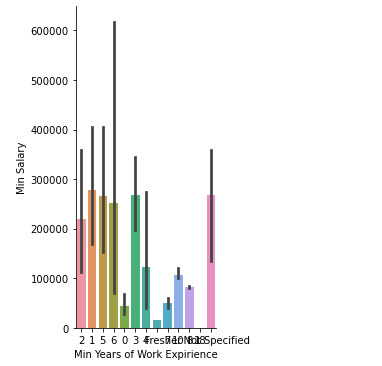

In [46]:
min_salary_df = monster_ph_json[(monster_ph_json["Min Salary"] != "                                      Not Specified                                 ") & 
                                (monster_ph_json["Min Years of Work Expirience"] != "Not Specified")]
min_salary_df
#plot_order = min_salary_df.sort_values(by='Min Years of Work Expirience', ascending=False).ID.values
ax = sns.catplot(x="Min Years of Work Expirience", y="Min Salary",kind="bar", data=min_salary_df)

In [47]:
min_salary_df["Min Years of Work Expirience"]

2        2
7        2
10       2
18       1
20       5
        ..
7870    18
7871    18
7873     3
7888    18
7889    18
Name: Min Years of Work Expirience, Length: 408, dtype: object